<a href="https://colab.research.google.com/github/Ankan-238/Patient_Survival_Detection/blob/main/Patient_Survival_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the basic libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data and Perform Preprocessing

In [11]:
pat_df = pd.read_csv(r"/content/Dataset.csv")
pat_df.head(20)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.000000,51.000000,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,...,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.000000,337.000000,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.560000,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,NaN,301.0,403.01,0,0.0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0.0,130.0,NaN,NaN,NaN,NaN,...,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.450000,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,156.6,NaN,108.0,203.01,0,0.0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1.0,138.0,43.0,43.0,370.0,7.42,...,NaN,NaN,NaN,NaN,278.0,278.0,4.2,4.2,1

In [12]:
pat_df.shape

(40001, 186)

In [13]:
pat_df.isna().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            1927
                               ... 
leukemia                        347
lymphoma                        347
solid_tumor_with_metastasis     347
apache_3j_bodysystem            811
apache_2_bodysystem             811
Length: 186, dtype: int64

# Dropping Columns with Null values having threshold of 0.5

In [14]:
thresh = len(pat_df) * .5
pat_df.dropna(thresh = thresh, axis = 1, inplace = True)

Dataset contains both non-numeric( object type) and numeric(int/float) data. 
Hence, we need to perform encoding of those features. Since the feature columns are numerous and varied, we shall
execute label-encoding to the above data.

In [15]:
pat_df.nunique()

encounter_id                   40001
patient_id                     40001
hospital_id                       69
hospital_death                     2
age                               74
                               ...  
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
apache_3j_bodysystem              11
apache_2_bodysystem               10
Length: 114, dtype: int64

This shows that encounter_id and patient_id contain similar data, hence both can be removed.
Additionally, hospital_id is not relevant to hospital_death. So that too, can be removed.

In [16]:
pat_df=pat_df.drop(columns=['encounter_id','hospital_id','patient_id'])

In [17]:
#eth_unique=pat_df['ethnicity'].unique()
#eth_unique

# Import label encoder for encoding the non-numeric data

In [18]:

from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [19]:
pat_df.select_dtypes(include='object')

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...,...
39996,Caucasian,M,Recovery Room,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
39997,African American,F,Operating Room,Operating Room / Recovery,admit,CTICU,NaN,NaN
39998,African American,F,NaN,Accident & Emergency,admit,MICU,Cardiovascular,Cardiovascular
39999,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,Cardiovascular


In [20]:
pat_df['ethnicity']= label_encoder.fit_transform(pat_df['ethnicity']) 
pat_df['gender']= label_encoder.fit_transform(pat_df['gender'])
pat_df['hospital_admit_source']= label_encoder.fit_transform(pat_df['hospital_admit_source']) 
pat_df['icu_admit_source']= label_encoder.fit_transform(pat_df['icu_admit_source']) 
pat_df['icu_stay_type']= label_encoder.fit_transform(pat_df['icu_stay_type']) 
pat_df['icu_type']= label_encoder.fit_transform(pat_df['icu_type']) 
pat_df['apache_3j_bodysystem']= label_encoder.fit_transform(pat_df['apache_3j_bodysystem']) 
pat_df['apache_2_bodysystem']= label_encoder.fit_transform(pat_df['apache_2_bodysystem']) 

In [21]:
pat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Columns: 111 entries, hospital_death to apache_2_bodysystem
dtypes: float64(98), int64(13)
memory usage: 33.9 MB


We don't find any data in object datatype. Therefore, we can go ahead for further pre-processing. We perform univariate analysis to check the degree of skewdness of the data.

# Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


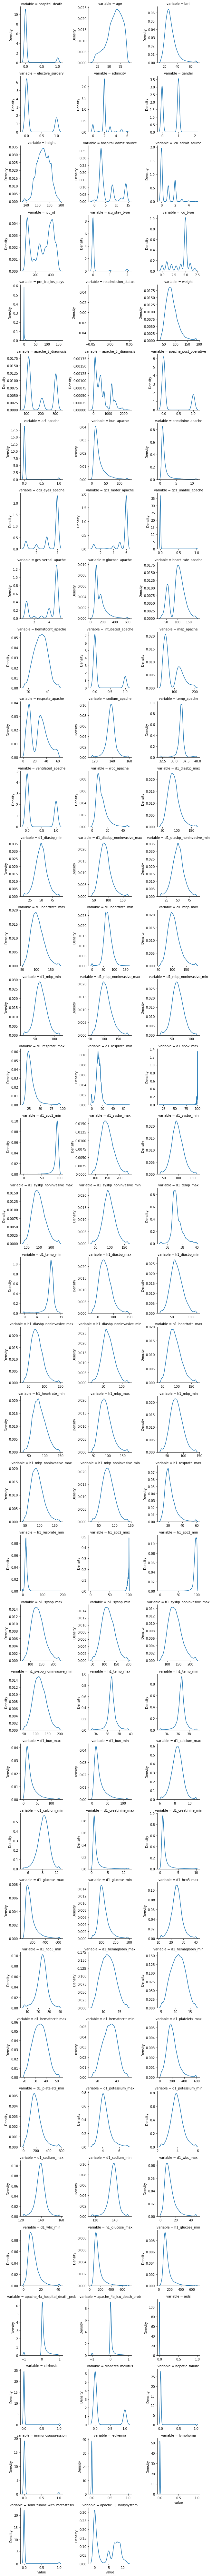

In [22]:
unpivot = pd.melt(pat_df, pat_df.describe().columns[-1], pat_df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


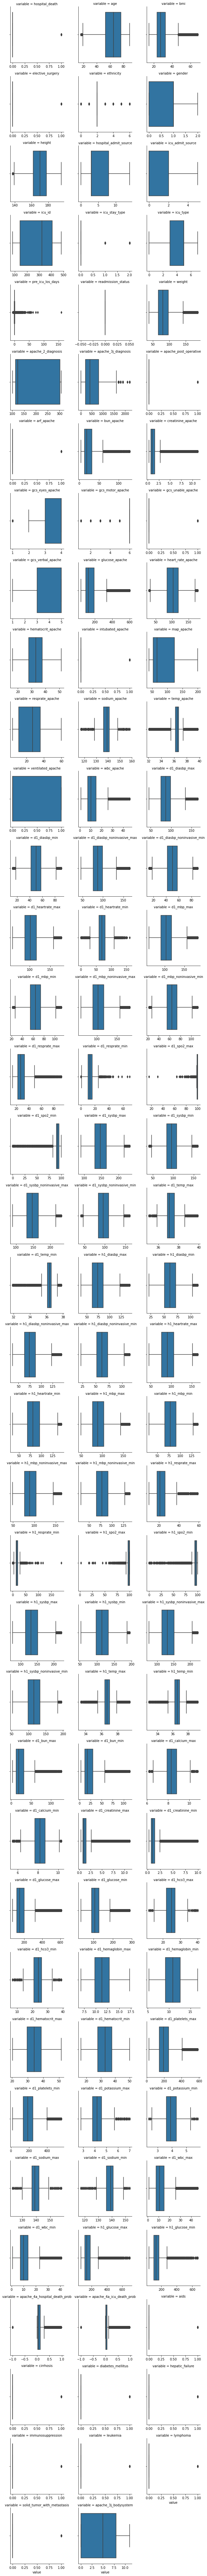

In [23]:
unpivot = pd.melt(pat_df, pat_df.describe().columns[-1], pat_df.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

# Removal of highly skewed columns

In [24]:
num_features=pat_df.dtypes[pat_df.dtypes!='object'].index
skew_features= pat_df[num_features].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_features})

In [25]:
skewness

,Skew
aids,33.616332
lymphoma,15.901425
pre_icu_los_days,12.010049
leukemia,11.883351
gcs_unable_apache,11.061798
...,...
d1_temp_min,-2.967800
d1_spo2_min,-4.795525
h1_spo2_min,-6.240047
h1_spo2_max,-7.335475


In [26]:
pat_df=pat_df.drop(columns=['aids','lymphoma','leukemia', 'pre_icu_los_days','gcs_unable_apache','d1_spo2_min','h1_spo2_min','h1_spo2_max','d1_spo2_max'])

In [27]:
pat_df=pat_df.drop(columns=['hepatic_failure','cirrhosis','solid_tumor_with_metastasis', 'immunosuppression','arf_apache'])

In [28]:
pat_df=pat_df.drop(columns=['icu_stay_type','d1_creatinine_min','d1_creatinine_max', 'creatinine_apache','readmission_status','gcs_motor_apache'])

In [29]:
pat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 40001 non-null  int64  
 1   age                            38074 non-null  float64
 2   bmi                            37610 non-null  float64
 3   elective_surgery               40001 non-null  int64  
 4   ethnicity                      40001 non-null  int64  
 5   gender                         40001 non-null  int64  
 6   height                         39476 non-null  float64
 7   hospital_admit_source          40001 non-null  int64  
 8   icu_admit_source               40001 non-null  int64  
 9   icu_id                         40001 non-null  int64  
 10  icu_type                       40001 non-null  int64  
 11  weight                         37898 non-null  float64
 12  apache_2_diagnosis             39191 non-null 

In [30]:
pat_df_copy=pat_df.copy()

# Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


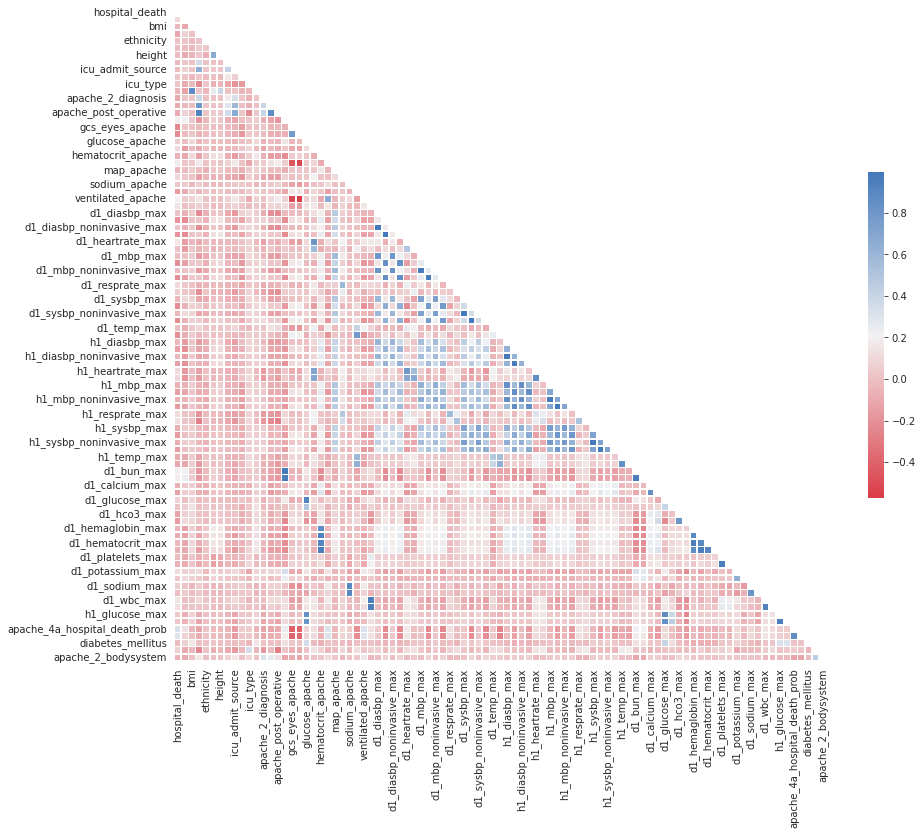

In [31]:
corr = pat_df_copy.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Removing Nan, null, very high float values(~ infinity) with Median

In [32]:
pat_df_copy=pat_df_copy.fillna(pat_df.median())

In [35]:
pat_df_copy['hospital_death'].value_counts()

0    36710
1     3291
Name: hospital_death, dtype: int64

# **Feature Selection**

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

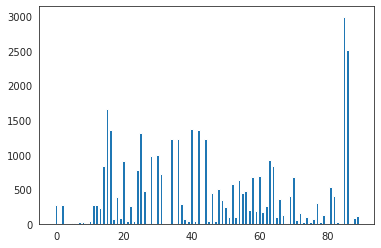

In [44]:
#f_classif

f_sel=SelectKBest(score_func=f_classif, k=40)
f_sel.fit(X_train, y_train)
X_train_fs= f_sel.transform(X_train)
X_test_fs= f_sel.transform(X_test)

plt.bar([i for i in range(len(f_sel.scores_))], f_sel.scores_)
plt.show()

In [54]:
#mutual_info_classif

def mutual_info_based(X_train, y_train, X_test, x=40):
  f_sel=SelectKBest(score_func=mutual_info_classif, k=40)
  f_sel.fit(X_train, y_train)
  X_train_fs= f_sel.transform(X_train)
  X_test_fs= f_sel.transform(X_test)

  return X_train_fs, X_test_fs, f_sel
#plt.bar([i for i in range(len(f_sel.scores_))], f_sel.scores_)
#plt.show()

# Splitting the data and scaling the data

In [55]:
from sklearn.model_selection import train_test_split

X = pat_df_copy.drop(["hospital_death"], axis=1)
y = pat_df_copy['hospital_death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_fs, X_test_fs, fs_sel = mutual_info_based(X_train, y_train, X_test, x=40)

In [59]:
#Upsampling the minority class: 1
from imblearn.over_sampling import SMOTE

In [66]:
def upsample_SMOTE(X_train,  y_train, ratio=1.0):
  sm = SMOTE(random_state=23, sampling_strategy=ratio)
  X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
  #print(len(X_train_sm), len(y_train_sm))
  return X_train_sm, y_train_sm

X_train_sm, y_train_sm= upsample_SMOTE(X_train_fs, y_train, ratio=0.15)

In [68]:
X_train=X_train_sm
y_train=y_train_sm
X_test=X_test_fs

In [69]:
#Scaling the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preparing baseline models using Random forest, SVM, Naive Bayes and Decision trees.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [83]:
ranf = RandomForestClassifier()
ranf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
y_pred=ranf.predict(X_test)

ranf_acc=accuracy_score(y_pred, y_test)
print("Accuracy of Random_forest Classifier: %.2f" % ranf_acc)
ranf_f1=f1_score(y_pred, y_test)
print("F1-Score of Random_forest Classifier: %.2f" % ranf_f1)
ranf_rs=recall_score(y_pred, y_test)
print("Recall score of Random_forest Classifier: %.2f" % ranf_rs)

Accuracy of Random_forest Classifier: 0.93
F1-Score of Random_forest Classifier: 0.42
Recall score of Random_forest Classifier: 0.65


In [81]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred=dectree.predict(X_test)

dectree_acc=accuracy_score(y_pred, y_test)
print("Accuracy of Decision Trees: %.2f" % dectree_acc)
dectree_f1=f1_score(y_pred, y_test)
print("F1-Score of Decision Trees: %.2f" % dectree_f1)
dectree_rs=recall_score(y_pred, y_test)
print("Recall score of Decision Trees: %.2f" % dectree_rs)

Accuracy of Decision Trees: 0.88
F1-Score of Decision Trees: 0.34
Recall score of Decision Trees: 0.31


In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [79]:
nb= MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [80]:
y_pred=nb.predict(X_test)

nb_acc=accuracy_score(y_pred, y_test)
print("Accuracy of Naive-Bayes: %.2f" % nb_acc)
nb_f1=f1_score(y_pred, y_test)
print("F1-Score of Naive-Bayes: %.2f" % nb_f1)
nb_rs=recall_score(y_pred, y_test)
print("Recall score of Naive-Bayes: %.2f" % nb_rs)

Accuracy of Naive-Bayes: 0.91
F1-Score of Naive-Bayes: 0.32
Recall score of Naive-Bayes: 0.47


In [75]:
svm= SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [78]:
y_pred=svm.predict(X_test)

svm_acc=accuracy_score(y_pred, y_test)
print("Accuracy of SVM: %.2f" % svm_acc)
svm_f1=f1_score(y_pred, y_test)
print("F1-Score of SVM: %.2f" % svm_f1)
svm_rs=recall_score(y_pred, y_test)
print("Recall score of SVM: %.2f" % svm_rs)

Accuracy of SVM: 0.93
F1-Score of SVM: 0.36
Recall score of SVM: 0.65


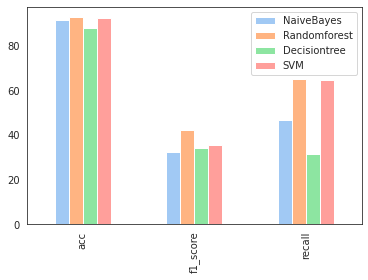

In [85]:
error_rec = {
    "NaiveBayes": {
        "acc": nb_acc*100,
        "f1_score": nb_f1*100,
        "recall": nb_rs*100
    },
    "Randomforest": {
        "acc": ranf_acc*100,
        "f1_score": ranf_f1*100,
        "recall": ranf_rs*100
    },
    "Decisiontree": {
        "acc": dectree_acc*100,
        "f1_score": dectree_f1*100,
        "recall": dectree_rs*100
    },
    "SVM": {
        "acc": svm_acc*100,
        "f1_score": svm_f1*100,
        "recall": svm_rs*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

Random Forest Classifier and SVM has the highest accuracy amongst all the models.

# Hyperparameter tuning the Random forest and SVM models using GridSearchCV.

In [86]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [87]:
# parameter grid
parameters = {
    'max_depth': [8, 10, 15], 
    'min_samples_split': [8, 12, 14],
    'n_estimators'  : [10, 20, 25],
}

In [88]:
clf = GridSearchCV(ranf,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)

In [89]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 15],
                         'min_samples_split': [8, 12, 14],
                         'n_estimators': [10, 20, 25]},
             scoring='accuracy')

In [90]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'max_depth': 15, 'min_samples_split': 8, 'n_estimators': 25}
Accuracy : 0.9189720553696732


In [98]:
ranf = RandomForestClassifier(max_depth = 15, 
                            min_samples_split = 8, 
                            n_estimators = 25)
ranf.fit(X_train,y_train)
y_pred = ranf.predict(X_test)
print("Accuracy:",ranf.score(X_test, y_test))

Accuracy: 0.9273539883342171


Hyperparameter tuning the SVM model

In [92]:
parameters_svm = {
    'C': [0.01, 0.1, 1]
}

clf = GridSearchCV(svm,                    # model
                   param_grid = parameters_svm,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   verbose=3,
                   cv=5)

In [93]:
print(svm.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [94]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ............................C=0.01;, score=0.870 total time=  15.6s
[CV 2/5] END ............................C=0.01;, score=0.870 total time=  15.8s
[CV 3/5] END ............................C=0.01;, score=0.870 total time=  16.3s
[CV 4/5] END ............................C=0.01;, score=0.870 total time=  16.4s
[CV 5/5] END ............................C=0.01;, score=0.869 total time=  15.8s
[CV 1/5] END .............................C=0.1;, score=0.890 total time=  15.2s
[CV 2/5] END .............................C=0.1;, score=0.888 total time=  14.9s
[CV 3/5] END .............................C=0.1;, score=0.888 total time=  14.9s
[CV 4/5] END .............................C=0.1;, score=0.891 total time=  17.7s
[CV 5/5] END .............................C=0.1;, score=0.895 total time=  17.7s
[CV 1/5] END ...............................C=1;, score=0.896 total time=  16.0s
[CV 2/5] END ...............................C=1;,

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.01, 0.1, 1]},
             scoring='accuracy', verbose=3)

In [95]:
print("Tuned Hyperpara01.meters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperpara01.meters : {'C': 1}
Accuracy : 0.9071389555595628


In [97]:
svm = SVC(C = 1, verbose = 3)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("Accuracy:",svm.score(X_test, y_test))

[LibSVM]Accuracy: 0.9252329368987198


# Accuracy for Random Forest on Test set: 0.927

Accuracy for SVM(libLinear) on Test set: 0.922 

Accuracy for SVM(libSVM) on Test set: 0.925

# Saving the final models

In [99]:
import joblib

#Saving the model
joblib.dump(svm, 'libsvm_psd_tuned_jlib')

['libsvm_psd_tuned_jlib']

In [105]:
joblib.dump(ranf , 'ranf_psd_tuned_jlib')

['ranf_psd_tuned_jlib']

In [101]:
ranf_jlib = joblib.load('ranf_psd_tuned_jlib')

In [102]:
ranf_jlib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
svm_jlib = joblib.load('libsvm_psd_tuned_jlib')

In [104]:
svm_jlib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])